In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [3]:
df = pd.read_csv("co2.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2284 entries, 0 to 2283
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    2284 non-null   object 
 1   co2     2225 non-null   float64
dtypes: float64(1), object(1)
memory usage: 35.8+ KB


In [4]:
df.isna().sum()

time     0
co2     59
dtype: int64

In [5]:
df["time"] = pd.to_datetime(df["time"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2284 entries, 0 to 2283
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    2284 non-null   datetime64[ns]
 1   co2     2225 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 35.8 KB


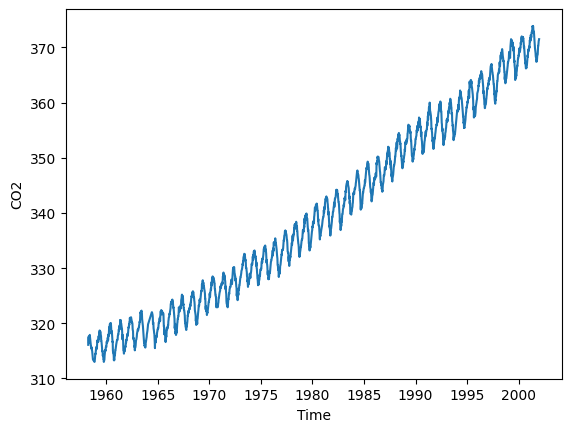

In [6]:
fig, ax = plt.subplots()
df["co2"] = df["co2"].interpolate()
ax.plot(df["time"], df["co2"])
ax.set_xlabel("Time")
ax.set_ylabel("CO2")
plt.show()

In [7]:
window_size = 5
count = 1
while count < window_size :
    df["co2_{}".format(count)] = df["co2"].shift(-count)
    count += 1
df["target"] = df["co2"].shift(-count)
df = df.dropna(axis=0)

In [8]:
x = df.drop(["time","target"], axis=1)
y = df["target"]

In [9]:
train_ratio = 0.8
num_samples = len(df)
x_train = x[:int(num_samples * train_ratio)]
y_train = y[:int(num_samples * train_ratio)]
x_test = x[int(num_samples * train_ratio):]
y_test = y[int(num_samples * train_ratio):]

In [10]:
reg = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
])
reg.fit(x_train, y_train)
y_predict = reg.predict(x_test)
mae = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
print("MAE: ", mae)
print("R2: ", r2)

MAE:  0.3605603788359215
R2:  0.9907505918201437


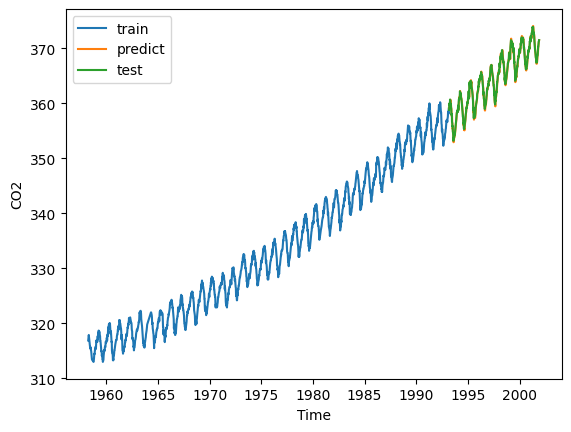

In [11]:
fig, ax = plt.subplots()
ax.plot(df["time"][:int(num_samples * train_ratio)], y_train, label="train")
ax.plot(df["time"][int(num_samples * train_ratio):], y_predict, label="predict")
ax.plot(df["time"][int(num_samples * train_ratio):], y_test, label="test")
ax.set_xlabel("Time")
ax.set_ylabel("CO2")
ax.legend()
plt.show()

In [ ]:
current_data = [375.5, 378.8, 380.1, 382, 383.4]
prediction = reg.predict([current_data]).tolist()
for i in range(10):
    print(current_data)
    prediction = reg.predict([current_data]).tolist()
    print("CO2 in week {} is {}".format(i+1, prediction[0]))
    current_data = current_data[1:] + prediction
    print("--------")